In [ ]:
'''
    Upper Confidence Bound (UCB) -->
    
    The Upper Confidence Bound (UCB) is a popular approach in multi-armed
    bandit problems where an agent must balance exploration (trying different
    options to gather information) and exploitation (choosing the best-known option).
    It is used to optimize the selection of actions based on observed rewards.
'''

In [ ]:
'''
    Problem Context -->
        
    Imagine you have n slot machines (or "arms") with unknown probabilities
    of reward. The goal is to maximize your total reward over time by
    pulling the arms intelligently.

    How It Works -->
    
    Initialization:
    Pull each arm once to get initial reward estimates.
    
    Iterate:
    For each arm, compute the UCB score.
    Select the arm with the highest UCB score.
    Update the reward estimate and pull count for the chosen arm.
    Repeat until a stopping condition (e.g., time limit) is met.
    
    Key Features -->
    
    Exploration:
    Arms with fewer pulls are favored because of the ln t/Ni(t) term.
    
    Exploitation:
    Arms with higher average rewards (μi) are preferred over time.
'''

In [ ]:
'''
    Applications -->
    
    Recommender Systems: Selecting items or advertisements to display.
    Clinical Trials: Choosing treatments to test on patients.
    Online Learning: Optimizing decisions in real-time scenarios.
'''

<img src='Source/UCB.png' alt='Formula' style="width:500px; height:auto; margin-left:40px;">

In [3]:
#   Importing Libraries -->

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
#   Importing Dataset -->

data = pd.read_csv('Data/Ads_CTR_Optimisation.csv')
data.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [5]:
#   Implementing UCB -->

num_users = 10000
num_ads = 10
ads_selected = []
num_selections = [0] * num_ads
sum_reward = [0] * num_ads
total_reward = 0

for rounds in range(0,num_users):
    ad = 0
    max_upper_bound = 0
    
    for ads in range(0,num_ads):
        
        if (num_selections[ads] > 0):
            avg_reward = sum_reward[ads] / num_selections[ads]
            delta = math.sqrt(3/2 * math.log(rounds+1)/num_selections[ads])
            upper_bound = avg_reward + delta
            
        else:
            upper_bound = 1e400 # Super high value
            
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = ads

    ads_selected.append(ad)
    num_selections[ad] += 1
    reward = data.values[rounds, ad]
    sum_reward[ad] += reward
    total_reward += reward

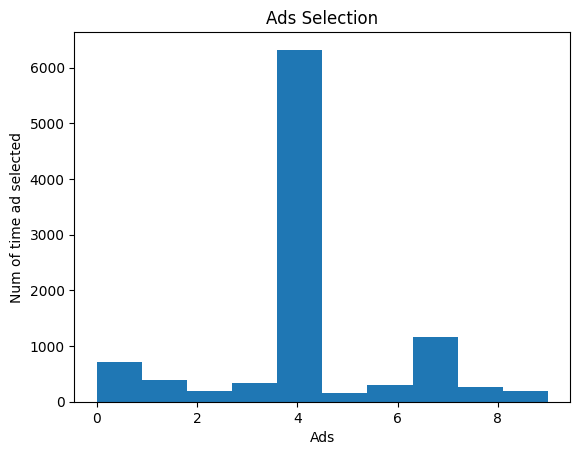

In [6]:
#   Visualizing The Results -->

plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Num of time ad selected')
plt.show()

In [ ]:
#   Ad 5 is selected the most !

In [7]:
#   Let's see how quickly it can identify -->

#   Changing num_users to 1000 to reduce number of rounds !

num_users = 1000
num_ads = 10
ads_selected = []
num_selections = [0] * num_ads
sum_reward = [0] * num_ads
total_reward = 0

for rounds in range(0,num_users):
    ad = 0
    max_upper_bound = 0
    
    for ads in range(0,num_ads):
        
        if (num_selections[ads] > 0):
            avg_reward = sum_reward[ads] / num_selections[ads]
            delta = math.sqrt(3/2 * math.log(rounds+1)/num_selections[ads])
            upper_bound = avg_reward + delta
            
        else:
            upper_bound = 1e400 # Super high value
            
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = ads

    ads_selected.append(ad)
    num_selections[ad] += 1
    reward = data.values[rounds, ad]
    sum_reward[ad] += reward
    total_reward += reward

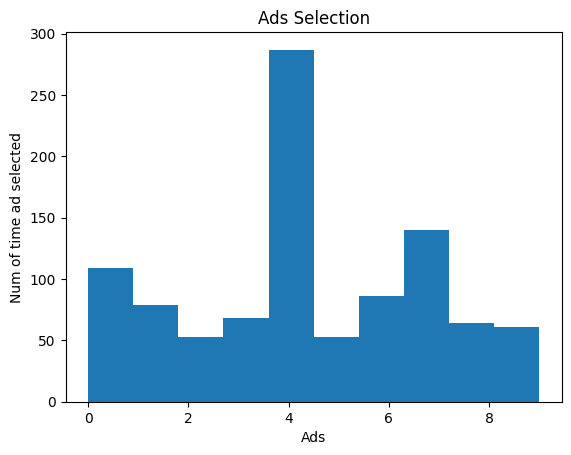

In [8]:
#   Visualizing The Results -->

plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Num of time ad selected')
plt.show()

In [ ]:
#   It is still identifying the ad which is most selected !

In [9]:
#   Let's make it 500 -->

num_users = 500
num_ads = 10
ads_selected = []
num_selections = [0] * num_ads
sum_reward = [0] * num_ads
total_reward = 0

for rounds in range(0,num_users):
    ad = 0
    max_upper_bound = 0
    
    for ads in range(0,num_ads):
        
        if (num_selections[ads] > 0):
            avg_reward = sum_reward[ads] / num_selections[ads]
            delta = math.sqrt(3/2 * math.log(rounds+1)/num_selections[ads])
            upper_bound = avg_reward + delta
            
        else:
            upper_bound = 1e400 # Super high value
            
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = ads

    ads_selected.append(ad)
    num_selections[ad] += 1
    reward = data.values[rounds, ad]
    sum_reward[ad] += reward
    total_reward += reward

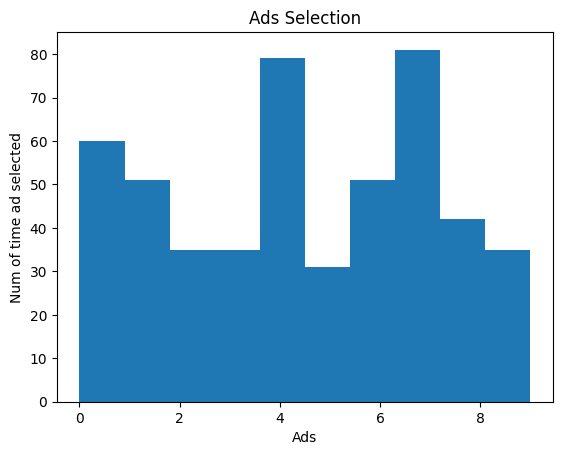

In [10]:
#   Visualizing The Results -->

plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Num of time ad selected')
plt.show()

In [ ]:
#   You can see it is unable to identify the ad in 500 rounds !